In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk import word_tokenize, sent_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
ind = stopwords.words('indonesian')

In [3]:
df = pd.read_csv('data/tweet_mbankingbca.csv')
df

,Datetime,Tweet Id,Text,Username
0,2022-04-01 07:30:56+00:00,1509795431496433668,Tips\n•\nGempa\nMbanking BCA\nMuhammadiyah\n#S...,kalopsia50
1,2022-04-01 07:30:48+00:00,1509795400043343874,"Digadang gantikan BCA Mobile, Aplikasi myBCA M...",suarapanturacom
2,2022-04-01 07:30:34+00:00,1509795338651340808,Inpo Mbanking Bca mu opo yo eror .?,andreasirwanto1
3,2022-04-01 07:30:25+00:00,1509795302982979586,BCA Mobile Ditutup? Apa Pengganti BCA Mobile? ...,suarapanturacom
4,2022-04-01 07:29:41+00:00,1509795117007511553,ternyata mbanking bca emg error pantesan td ma...,kesayangananon
...,...,...,...,...
7729,2022-01-02 04:39:09+00:00,1477499680686702594,Mbanking BCA UInya kalah modern sama BRI hahah...,multiakgae
7730,2022-01-02 03:47:45+00:00,1477486745126064131,@yteeam mbanking bca itu paling gampang and ga...,icapdf
7731,2022-01-02 02:08:44+00:00,1477461828749856768,Udh terbiasa sama pelayanan BCA dan pake mbank...,Nadagtx
7732,2022-01-01 22:14:09+00:00,1477402794210754563,Halobca cara ganti pin mbanking bca mobile saya,bella08579822


In [4]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.head()

,Datetime,Tweet Id,Text,Username
0,2022-04-01 07:30:56+00:00,1509795431496433668,Tips\n•\nGempa\nMbanking BCA\nMuhammadiyah\n#S...,kalopsia50
1,2022-04-01 07:30:48+00:00,1509795400043343874,"Digadang gantikan BCA Mobile, Aplikasi myBCA M...",suarapanturacom
2,2022-04-01 07:30:34+00:00,1509795338651340808,Inpo Mbanking Bca mu opo yo eror .?,andreasirwanto1
3,2022-04-01 07:30:25+00:00,1509795302982979586,BCA Mobile Ditutup? Apa Pengganti BCA Mobile? ...,suarapanturacom
4,2022-04-01 07:29:41+00:00,1509795117007511553,ternyata mbanking bca emg error pantesan td ma...,kesayangananon


In [18]:
df.groupby([df.Datetime.dt.month,df.Datetime.dt.day])['Text'].agg?

Object `agg` not found.


In [ ]:
df.groupby([df.Datetime.dt.month,df.Datetime.dt.day])['Text'].agg

## Preprocessing Data Text Twitter

In [5]:
df_processed = df.copy()
df_processed.head()

,Datetime,Tweet Id,Text,Username
0,2022-04-01 07:30:56+00:00,1509795431496433668,Tips\n•\nGempa\nMbanking BCA\nMuhammadiyah\n#S...,kalopsia50
1,2022-04-01 07:30:48+00:00,1509795400043343874,"Digadang gantikan BCA Mobile, Aplikasi myBCA M...",suarapanturacom
2,2022-04-01 07:30:34+00:00,1509795338651340808,Inpo Mbanking Bca mu opo yo eror .?,andreasirwanto1
3,2022-04-01 07:30:25+00:00,1509795302982979586,BCA Mobile Ditutup? Apa Pengganti BCA Mobile? ...,suarapanturacom
4,2022-04-01 07:29:41+00:00,1509795117007511553,ternyata mbanking bca emg error pantesan td ma...,kesayangananon


In [6]:
# Lower

df_processed['Text'] = df_processed['Text'].apply(lambda x : x.lower())
df_processed.head()

,Datetime,Tweet Id,Text,Username
0,2022-04-01 07:30:56+00:00,1509795431496433668,tips\n•\ngempa\nmbanking bca\nmuhammadiyah\n#s...,kalopsia50
1,2022-04-01 07:30:48+00:00,1509795400043343874,"digadang gantikan bca mobile, aplikasi mybca m...",suarapanturacom
2,2022-04-01 07:30:34+00:00,1509795338651340808,inpo mbanking bca mu opo yo eror .?,andreasirwanto1
3,2022-04-01 07:30:25+00:00,1509795302982979586,bca mobile ditutup? apa pengganti bca mobile? ...,suarapanturacom
4,2022-04-01 07:29:41+00:00,1509795117007511553,ternyata mbanking bca emg error pantesan td ma...,kesayangananon


In [7]:
# mengubah kalimat menjadi kata

df_processed['Text'] = df_processed['Text'].apply(lambda x : word_tokenize(x))
df_processed['Text']

0       [tips, •, gempa, mbanking, bca, muhammadiyah, ...
1       [digadang, gantikan, bca, mobile, ,, aplikasi,...
2          [inpo, mbanking, bca, mu, opo, yo, eror, ., ?]
3       [bca, mobile, ditutup, ?, apa, pengganti, bca,...
4       [ternyata, mbanking, bca, emg, error, pantesan...
                              ...                        
7729    [mbanking, bca, uinya, kalah, modern, sama, br...
7730    [@, yteeam, mbanking, bca, itu, paling, gampan...
7731    [udh, terbiasa, sama, pelayanan, bca, dan, pak...
7732    [halobca, cara, ganti, pin, mbanking, bca, mob...
7733    [mbanking, bca, error, apa, gimana, sih, ih, k...
Name: Text, Length: 7734, dtype: object

In [8]:
# Hapus stopwords indonesia

def removeStopWords(text):
    words = []
    for word in text:
        if word not in ind:
            words.append(word)
    return words

df_processed['Text'] = df_processed['Text'].apply(lambda x : removeStopWords(x))
df_processed['Text']

0       [tips, •, gempa, mbanking, bca, muhammadiyah, ...
1       [digadang, gantikan, bca, mobile, ,, aplikasi,...
2          [inpo, mbanking, bca, mu, opo, yo, eror, ., ?]
3       [bca, mobile, ditutup, ?, pengganti, bca, mobi...
4       [mbanking, bca, emg, error, pantesan, td, top,...
                              ...                        
7729    [mbanking, bca, uinya, kalah, modern, bri, hah...
7730    [@, yteeam, mbanking, bca, gampang, and, gak, ...
7731    [udh, terbiasa, pelayanan, bca, pake, mbanking...
7732         [halobca, ganti, pin, mbanking, bca, mobile]
7733    [mbanking, bca, error, gimana, sih, ih, kesel,...
Name: Text, Length: 7734, dtype: object

In [14]:
def hapusSimbol(sentence): #tokenize first
    words = []
    for word in sentence:
        if word.isalpha():
            words.append(word)
    return words

df_processed['Text'] = df_processed['Text'].apply(lambda x : hapusSimbol(x))
df_processed['Text']

0       [tips, gempa, mbanking, bca, muhammadiyah, see...
1       [digadang, gantikan, bca, mobile, aplikasi, my...
2                [inpo, mbanking, bca, mu, opo, yo, eror]
3       [bca, mobile, ditutup, pengganti, bca, mobile,...
4       [mbanking, bca, emg, error, pantesan, td, top,...
                              ...                        
7729    [mbanking, bca, uinya, kalah, modern, bri, hah...
7730    [yteeam, mbanking, bca, gampang, and, gak, ribet]
7731    [udh, terbiasa, pelayanan, bca, pake, mbanking...
7732         [halobca, ganti, pin, mbanking, bca, mobile]
7733    [mbanking, bca, error, gimana, sih, ih, kesel,...
Name: Text, Length: 7734, dtype: object

In [15]:
# Stemming

lemmatizer_obj = WordNetLemmatizer()
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemm(data):
    words = []
    for word in data:
        stm = stemmer.stem(word)
        words.append(stm)
    return words

df_processed['Text'] = df_processed['Text'].apply(lambda x: [stemmer.stem(y) for y in x])
df_processed['Text']

0       [tips, gempa, mbanking, bca, muhammadiyah, see...
1       [gadang, ganti, bca, mobile, aplikasi, mybca, ...
2                [inpo, mbanking, bca, mu, opo, yo, eror]
3       [bca, mobile, tutup, ganti, bca, mobile, mybca...
4       [mbanking, bca, emg, error, pantesan, td, top,...
                              ...                        
7729    [mbanking, bca, uinya, kalah, modern, bri, hah...
7730    [yteeam, mbanking, bca, gampang, and, gak, ribet]
7731    [udh, biasa, layan, bca, pake, mbanking, bca, ...
7732         [halobca, ganti, pin, mbanking, bca, mobile]
7733    [mbanking, bca, error, gimana, sih, ih, kesel,...
Name: Text, Length: 7734, dtype: object

In [16]:
# CHECKPOINT STEMMING

df_processed.to_csv('tweet_stemmed.csv', index=False)

In [17]:
# menghapus kata duplikat pada 1 dokumen

df_processed['Text'] = [ set(w) for w in df_processed['Text']]
df_processed['Text']

0       {gempa, muhammadiyah, bca, https, seeyounextye...
1       {aplikasi, gadang, https, bca, mybca, keluh, g...
2                {yo, bca, mu, eror, inpo, opo, mbanking}
3       {https, bca, mybca, tutup, ganti, mobile, mban...
4       {error, kaga, bca, kag, up, gue, pantesan, bel...
                              ...                        
7729    {modern, https, bca, kalah, mbanking, hahah, u...
7730    {bca, yteeam, and, ribet, gak, gampang, mbanking}
7731    {layan, bca, udh, nyoba, bikin, biasa, pas, at...
7732         {bca, pin, halobca, ganti, mobile, mbanking}
7733    {verif, error, bca, bgt, gimana, ih, kesel, ga...
Name: Text, Length: 7734, dtype: object

In [19]:
# Hapus kata kurang dari sama dengan 3 huruf

def hapusKata3huruf(sentence): #tokenize first
    words = []
    for word in sentence:
        if len(word) > 3 :
            words.append(word)
    return words

df_processed['Text'] = df_processed['Text'].apply(lambda x : hapusKata3huruf(x))
df_processed['Text']

0       [gempa, muhammadiyah, https, seeyounextyearbri...
1       [aplikasi, gadang, https, mybca, keluh, ganti,...
2                                  [eror, inpo, mbanking]
3          [https, mybca, tutup, ganti, mobile, mbanking]
4         [error, kaga, pantesan, beli, shopee, mbanking]
                              ...                        
7729       [modern, https, kalah, mbanking, hahah, uinya]
7730                   [yteeam, ribet, gampang, mbanking]
7731    [layan, nyoba, bikin, biasa, bank, mbanking, p...
7732                   [halobca, ganti, mobile, mbanking]
7733       [verif, error, gimana, kesel, gagal, mbanking]
Name: Text, Length: 7734, dtype: object

In [20]:
# memeriksa data kosong akibat cleaning
dataKosong = 0
for i in df_processed['Text']:
    if len(i)==0:
        dataKosong +=1
print(dataKosong)

0


In [21]:
# mengubah dari set/list ke text

df_processed['Text'] = [ " ".join(data) for data in df_processed['Text']]
df_processed['Text']

0       gempa muhammadiyah https seeyounextyearbri mba...
1       aplikasi gadang https mybca keluh ganti nasaba...
2                                      eror inpo mbanking
3                 https mybca tutup ganti mobile mbanking
4                error kaga pantesan beli shopee mbanking
                              ...                        
7729              modern https kalah mbanking hahah uinya
7730                        yteeam ribet gampang mbanking
7731           layan nyoba bikin biasa bank mbanking pake
7732                        halobca ganti mobile mbanking
7733              verif error gimana kesel gagal mbanking
Name: Text, Length: 7734, dtype: object

In [88]:
kata_perlu_dihapus = ['mbanking', 'mobile', 'https', 'halobca']

def hapus_kata_kosong(sentence):
    words = []
    for word in sentence:
        if word not in kata_perlu_dihapus :
            words.append(word)
    return words

df_processed['Text'] = df_processed['Text'].apply(lambda x : hapus_kata_kosong(x))
df_processed['Text']

0         [gempa, muhammadiyah, seeyounextyearbri, tips]
1       [aplikasi, gadang, mybca, keluh, ganti, nasabah]
2                                           [eror, inpo]
3                                  [mybca, tutup, ganti]
4                  [error, kaga, pantesan, beli, shopee]
                              ...                       
7729                       [modern, kalah, hahah, uinya]
7730                            [yteeam, ribet, gampang]
7731            [layan, nyoba, bikin, biasa, bank, pake]
7732                                             [ganti]
7733                [verif, error, gimana, kesel, gagal]
Name: Text, Length: 7734, dtype: object

In [89]:
df_processed.to_csv('data/tweet_clean.csv', index=False)

## Labelling menggunakan Lexicon

In [8]:
df_processed = pd.read_csv('data/tweet_clean.csv')
df_processed['Datetime'] = pd.to_datetime(df_processed['Datetime'])
df_processed

,Datetime,Tweet Id,Text,Username,sentiment_score,class
0,2022-04-01,1509795431496433668,gempa muhammadiyah seeyounextyearbri tips,kalopsia50,8,1
1,2022-04-01,1509795400043343874,aplikasi gadang mybca keluh ganti nasabah,suarapanturacom,-4,-1
2,2022-04-01,1509795338651340808,eror inpo,andreasirwanto1,-4,-1
3,2022-04-01,1509795302982979586,mybca tutup ganti,suarapanturacom,-2,-1
4,2022-04-01,1509795117007511553,error kaga pantesan beli shopee,kesayangananon,-8,-1
...,...,...,...,...,...,...
7729,2022-01-02,1477499680686702594,modern kalah hahah uinya,multiakgae,-1,-1
7730,2022-01-02,1477486745126064131,yteeam ribet gampang,icapdf,-3,-1
7731,2022-01-02,1477461828749856768,layan nyoba bikin biasa bank pake,Nadagtx,-2,-1
7732,2022-01-01,1477402794210754563,ganti,bella08579822,0,0


In [5]:
# import kamus lexicon

df_lc = pd.read_csv('../Data baru/Lexicon/modified_full_lexicon.csv') 
df_lc

,word,weight,number_of_words
0,hai,3,1
1,merekam,2,1
2,ekstensif,3,1
3,paripurna,1,1
4,detail,2,1
...,...,...,...
10245,sontoloyo,-5,1
10246,tai,-5,1
10247,telek,-5,1
10248,tolol,-5,1


In [6]:
def hitung_polaritas(sentence):
    sentiment_score = 0
    for word in sentence:
        score = df_lc[df_lc['word']==word]['weight'].sum()
#         print(score)
        sentiment_score += score
    return sentiment_score

In [10]:
df_processed['Text'] = df_processed['Text'].apply(lambda x : word_tokenize(x))
df_processed['Text']

TypeError: expected string or bytes-like object

In [100]:
df_processed['sentiment_score'] = df_processed['Text'].apply(lambda x : hitung_polaritas(x))
df_processed

,Datetime,Tweet Id,Text,Username,sentiment_score,class
0,2022-04-01 07:30:56+00:00,1509795431496433668,"[gempa, muhammadiyah, seeyounextyearbri, tips]",kalopsia50,8,1
1,2022-04-01 07:30:48+00:00,1509795400043343874,"[aplikasi, gadang, mybca, keluh, ganti, nasabah]",suarapanturacom,-4,-1
2,2022-04-01 07:30:34+00:00,1509795338651340808,"[eror, inpo]",andreasirwanto1,-4,-1
3,2022-04-01 07:30:25+00:00,1509795302982979586,"[mybca, tutup, ganti]",suarapanturacom,-2,-1
4,2022-04-01 07:29:41+00:00,1509795117007511553,"[error, kaga, pantesan, beli, shopee]",kesayangananon,-8,-1
...,...,...,...,...,...,...
7729,2022-01-02 04:39:09+00:00,1477499680686702594,"[modern, kalah, hahah, uinya]",multiakgae,-1,-1
7730,2022-01-02 03:47:45+00:00,1477486745126064131,"[yteeam, ribet, gampang]",icapdf,-3,-1
7731,2022-01-02 02:08:44+00:00,1477461828749856768,"[layan, nyoba, bikin, biasa, bank, pake]",Nadagtx,-2,-1
7732,2022-01-01 22:14:09+00:00,1477402794210754563,[ganti],bella08579822,0,0


In [101]:
# klasifikasi dari sentimen score

def lc_classifier(score):
    if score > 0:
        return 1
    elif score < 0:
        return -1
    else :
        return 0

df_processed['class'] = df_processed['sentiment_score'].apply(lambda x : lc_classifier(x))
df_processed

,Datetime,Tweet Id,Text,Username,sentiment_score,class
0,2022-04-01 07:30:56+00:00,1509795431496433668,"[gempa, muhammadiyah, seeyounextyearbri, tips]",kalopsia50,8,1
1,2022-04-01 07:30:48+00:00,1509795400043343874,"[aplikasi, gadang, mybca, keluh, ganti, nasabah]",suarapanturacom,-4,-1
2,2022-04-01 07:30:34+00:00,1509795338651340808,"[eror, inpo]",andreasirwanto1,-4,-1
3,2022-04-01 07:30:25+00:00,1509795302982979586,"[mybca, tutup, ganti]",suarapanturacom,-2,-1
4,2022-04-01 07:29:41+00:00,1509795117007511553,"[error, kaga, pantesan, beli, shopee]",kesayangananon,-8,-1
...,...,...,...,...,...,...
7729,2022-01-02 04:39:09+00:00,1477499680686702594,"[modern, kalah, hahah, uinya]",multiakgae,-1,-1
7730,2022-01-02 03:47:45+00:00,1477486745126064131,"[yteeam, ribet, gampang]",icapdf,-3,-1
7731,2022-01-02 02:08:44+00:00,1477461828749856768,"[layan, nyoba, bikin, biasa, bank, pake]",Nadagtx,-2,-1
7732,2022-01-01 22:14:09+00:00,1477402794210754563,[ganti],bella08579822,0,0


In [102]:
# mengubah dari set/list ke text

df_processed['Text'] = [ " ".join(data) for data in df_processed['Text']]
df_processed['Text']

0       gempa muhammadiyah seeyounextyearbri tips
1       aplikasi gadang mybca keluh ganti nasabah
2                                       eror inpo
3                               mybca tutup ganti
4                 error kaga pantesan beli shopee
                          ...                    
7729                     modern kalah hahah uinya
7730                         yteeam ribet gampang
7731            layan nyoba bikin biasa bank pake
7732                                        ganti
7733               verif error gimana kesel gagal
Name: Text, Length: 7734, dtype: object

## Exploratory Data Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


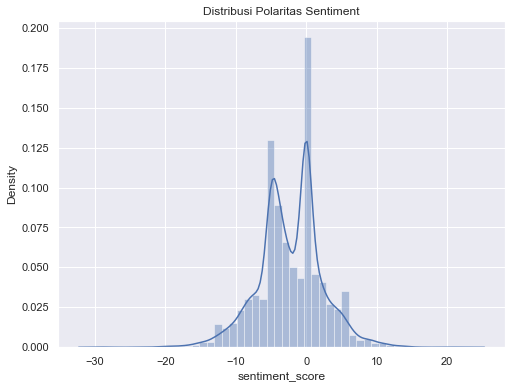

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.distplot(df_processed['sentiment_score'])
plt.title('Distribusi Polaritas Sentiment')
sns.set_theme()
plt.show()

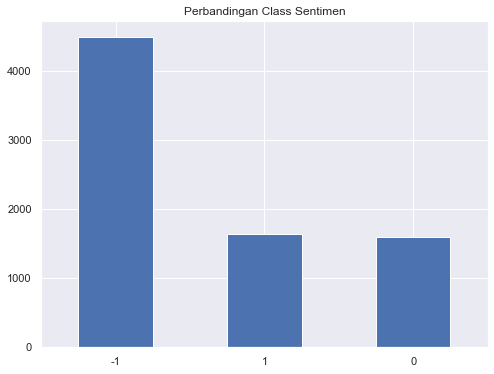

In [104]:
plt.figure(figsize=(8,6))
df_processed['class'].value_counts().plot(kind='bar')
plt.title('Perbandingan Class Sentimen')
plt.xticks(rotation=0)
plt.show()

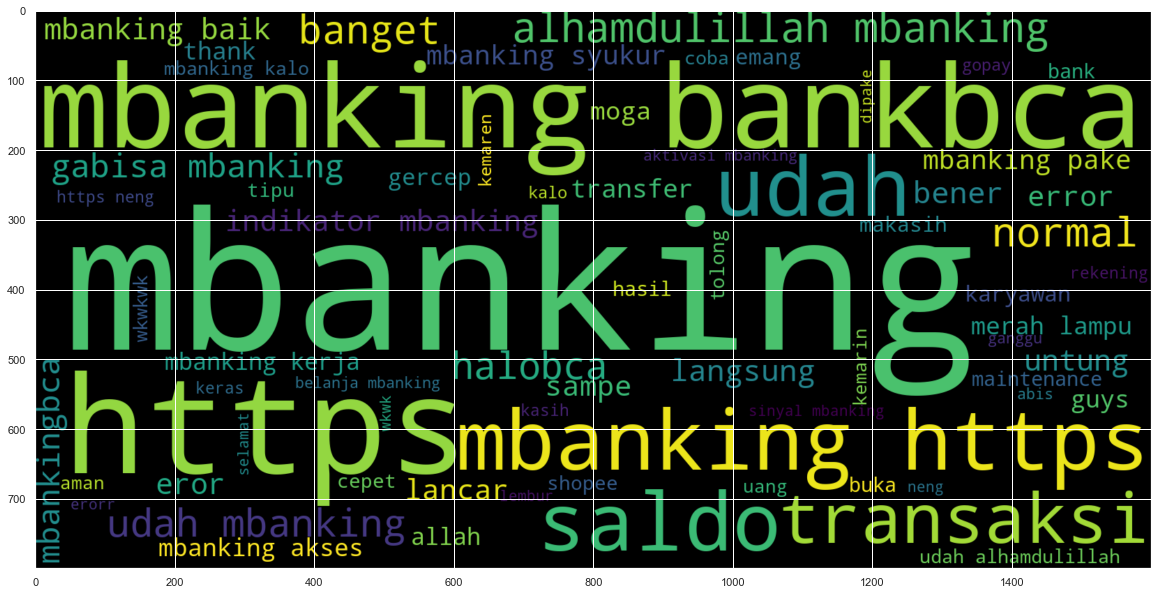

In [82]:
# WORDCLOUD SENTIMEN POSITIF

plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 70, width = 1600, height = 800).generate(" ".join(df_processed[df_processed['class'] == 1].Text))
plt.imshow(wc, interpolation='bilinear')

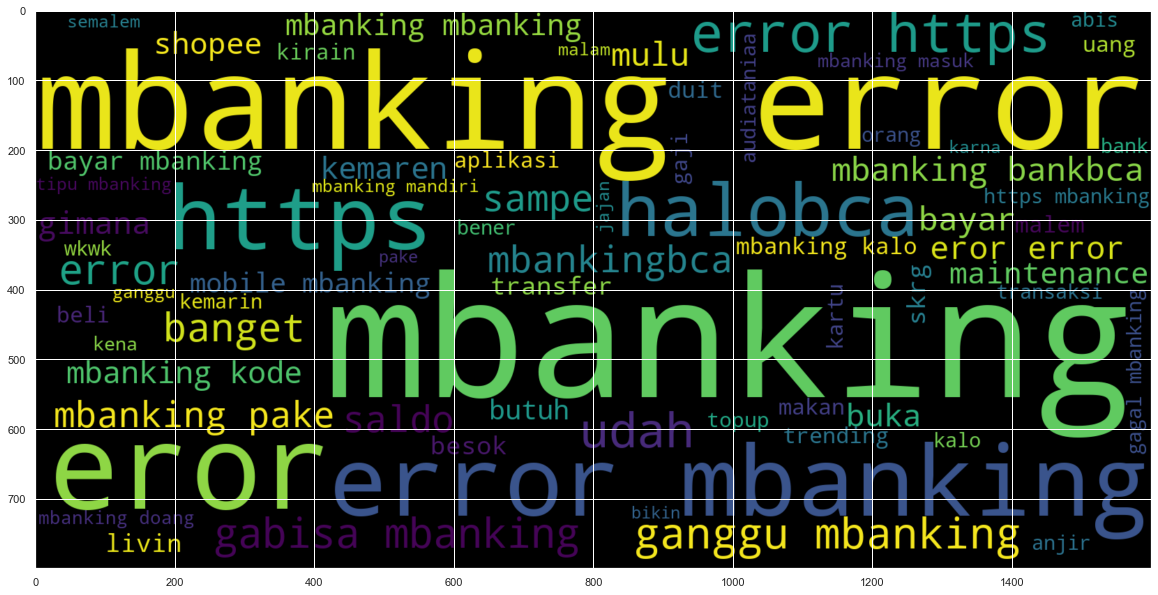

In [83]:
# WORDCLOUD SENTIMEN NEGATIF

plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 70, width = 1600, height = 800).generate(" ".join(df_processed[df_processed['class'] == -1].Text))
plt.imshow(wc, interpolation='bilinear')

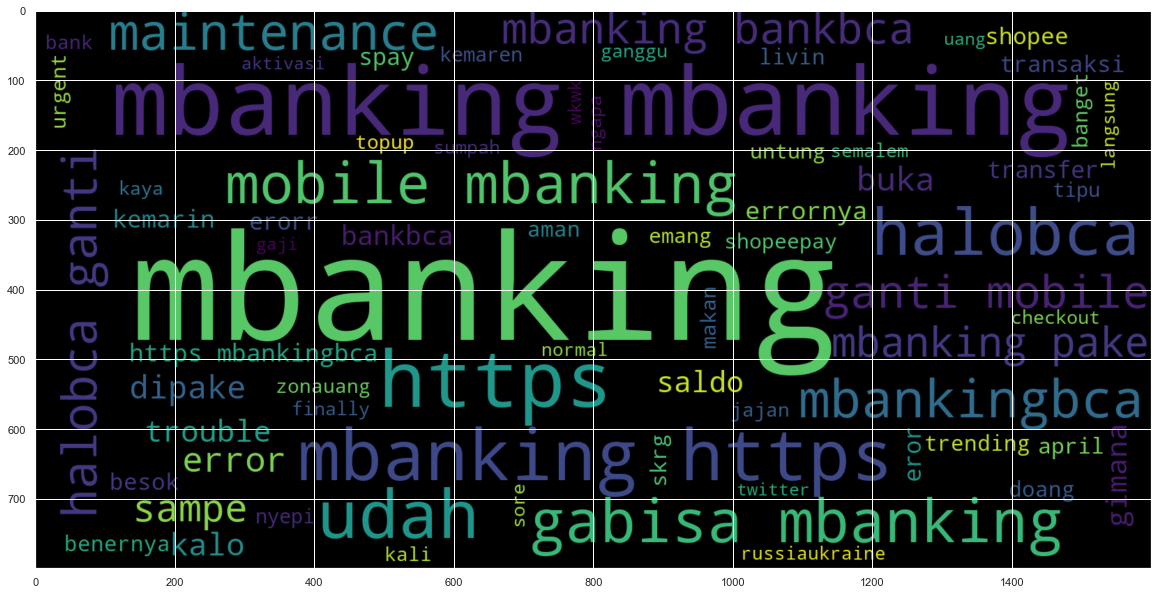

In [84]:
# WORDCLOUD SENTIMEN NEUTRAL

plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 70, width = 1600, height = 800).generate(" ".join(df_processed[df_processed['class'] == 0].Text))
plt.imshow(wc, interpolation='bilinear')

Terdapat beberapa kata yang tidak bermakna namun sering muncul, kata ini perlu di hapus seperti mbanking, mobile, https, halobca

In [85]:
kata_perlu_dihapus = ['mbanking', 'mobile', 'https', 'halobca']

### Wordcloud setelah penghapusan kata yg tidak perlu

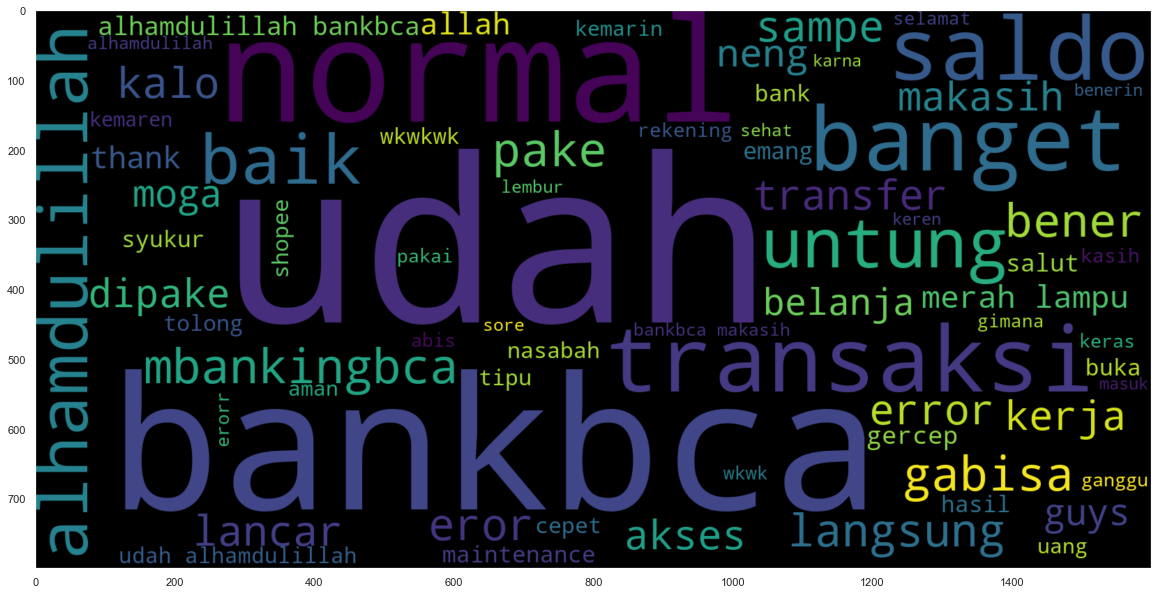

In [112]:
# WORDCLOUD SENTIMEN POSITIF

plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 70, width = 1600, height = 800).generate(" ".join(df_processed[df_processed['class'] == 1].Text))
plt.grid()
plt.imshow(wc, interpolation='bilinear')

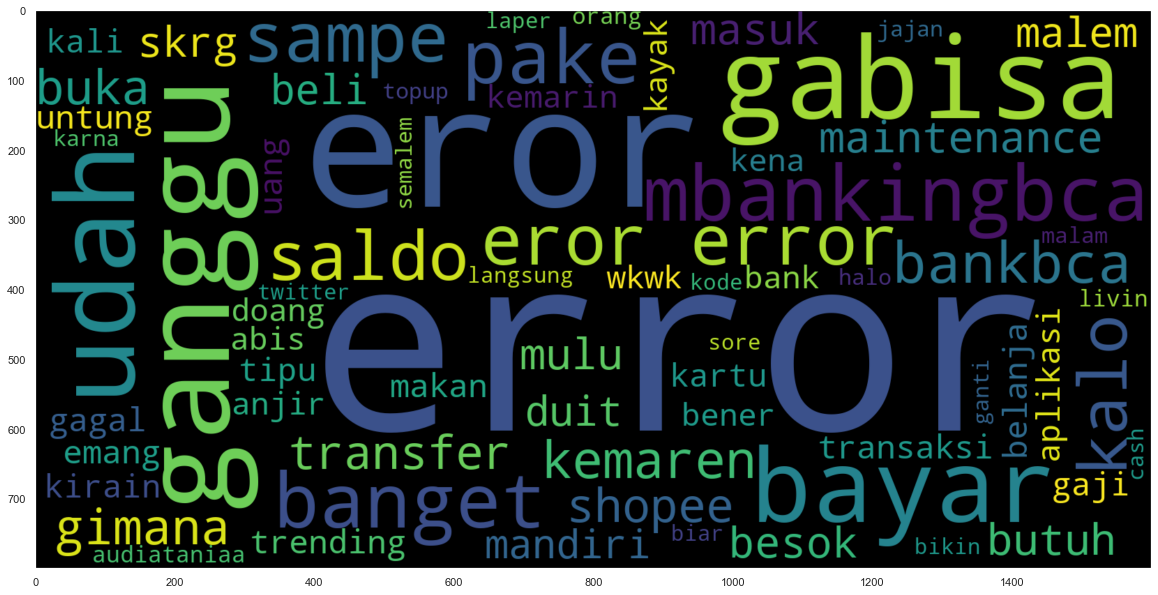

In [110]:
# WORDCLOUD SENTIMEN NEGATIF

plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 70, width = 1600, height = 800).generate(" ".join(df_processed[df_processed['class'] == -1].Text))
plt.grid()
plt.imshow(wc, interpolation='bilinear')

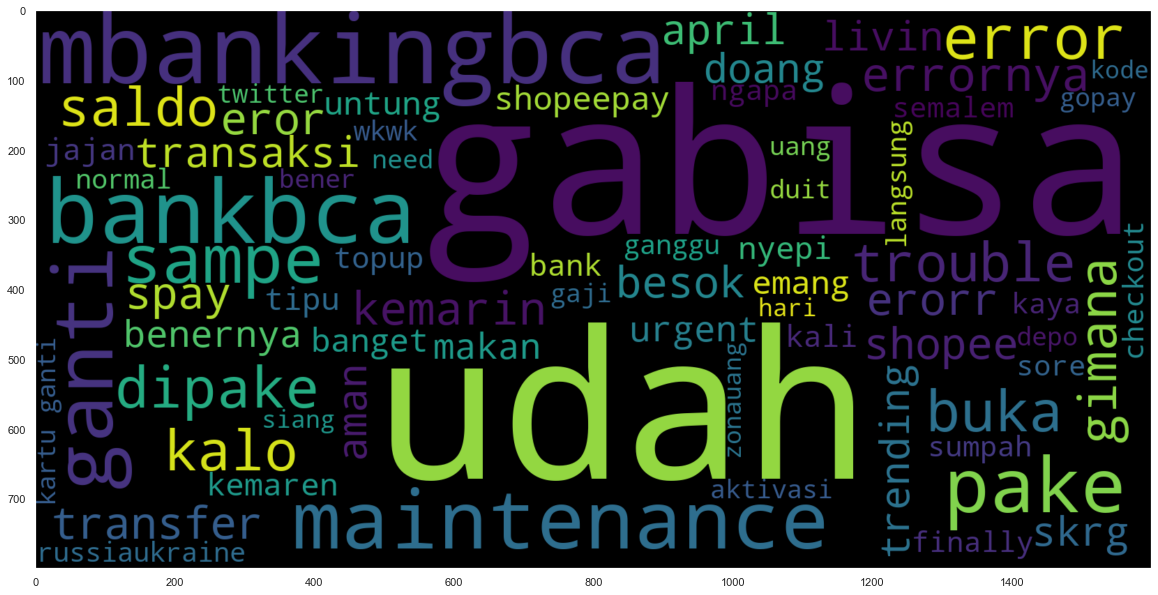

In [109]:
# WORDCLOUD SENTIMEN NEUTRAL

plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 70, width = 1600, height = 800).generate(" ".join(df_processed[df_processed['class'] == 0].Text))
plt.grid()
plt.imshow(wc, interpolation='bilinear')

In [11]:
df_processed = pd.read_csv('data/tweet_clean.csv')
df_processed['Datetime'] = pd.to_datetime(df_processed['Datetime'])
df_processed

,Datetime,Tweet Id,Text,Username,sentiment_score,class
0,2022-04-01,1509795431496433668,gempa muhammadiyah seeyounextyearbri tips,kalopsia50,8,1
1,2022-04-01,1509795400043343874,aplikasi gadang mybca keluh ganti nasabah,suarapanturacom,-4,-1
2,2022-04-01,1509795338651340808,eror inpo,andreasirwanto1,-4,-1
3,2022-04-01,1509795302982979586,mybca tutup ganti,suarapanturacom,-2,-1
4,2022-04-01,1509795117007511553,error kaga pantesan beli shopee,kesayangananon,-8,-1
...,...,...,...,...,...,...
7729,2022-01-02,1477499680686702594,modern kalah hahah uinya,multiakgae,-1,-1
7730,2022-01-02,1477486745126064131,yteeam ribet gampang,icapdf,-3,-1
7731,2022-01-02,1477461828749856768,layan nyoba bikin biasa bank pake,Nadagtx,-2,-1
7732,2022-01-01,1477402794210754563,ganti,bella08579822,0,0


In [13]:
import seaborn as sns

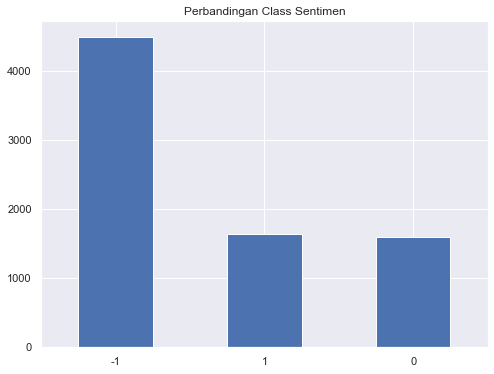

In [15]:
plt.figure(figsize=(8,6))
df_processed['class'].value_counts().plot(kind='bar')
plt.title('Perbandingan Class Sentimen')
sns.set_theme()
plt.xticks(rotation=0)
plt.show()

In [11]:
df_processed.groupby([df_processed.Datetime.dt.month,df_processed.Datetime.dt.day])['sentiment_score'].mean()

Datetime
1    -1009
2    -1100
3   -12618
4    -2786
Name: sentiment_score, dtype: int64

## ambil data sesuai tanggal observasi, periksa apakah ada null value

In [72]:
df_date = pd.DataFrame({
    'Datetime' : pd.date_range(start="2022-01-01",periods=91)
})
df_date

,Datetime
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05
...,...
86,2022-03-28
87,2022-03-29
88,2022-03-30
89,2022-03-31


dari keseluruhan data twitter, untuk periode 1 januari 2022 - 1 april 2022 tidak terdapat nilai null di satu hari pun

In [61]:
tweet_negatif = df_processed[df_processed['class']==-1].reset_index(drop=True)

<AxesSubplot:xlabel='sentiment_score', ylabel='Count'>

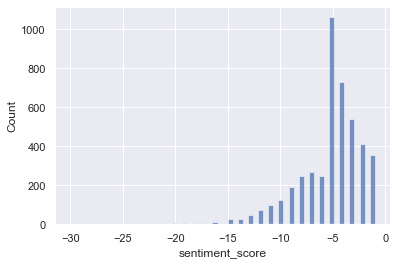

In [62]:
sns.histplot(tweet_negatif['sentiment_score'])

In [63]:
tweet_negatif = tweet_negatif[tweet_negatif['sentiment_score'] <= -5 ].reset_index(drop=True)
tweet_negatif

,Datetime,Tweet Id,Text,Username,sentiment_score,class
0,2022-04-01,1509795117007511553,error kaga pantesan beli shopee,kesayangananon,-8,-1
1,2022-04-01,1509794986333663240,error,enchantodd,-5,-1
2,2022-04-01,1509794770616750080,rencana error,oomblues,-7,-1
3,2022-04-01,1509794333935173633,twiter langsung ehhh bener cari info eror,fayainspyra,-5,-1
4,2022-04-01,1509794231417970688,error,krisseuyaa17,-5,-1
...,...,...,...,...,...,...
2455,2022-01-03,1477979974158061568,error inimah,Ardanardian26,-5,-1
2456,2022-01-03,1477977717320519682,rest duit peace buka boros sesal,junqween,-8,-1
2457,2022-01-03,1477973566960193536,cape sampe csnya pulsa hubungin abis trus nelfon,arasyi_nanda,-8,-1
2458,2022-01-02,1477666491122155522,kepake bodoh discommie briefing chocotpanpan pake,geunyang_jii,-5,-1


In [64]:
# tweet_positif = df_processed[df_processed['class']== 1].reset_index(drop=True)
tweets = pd.concat([tweet_positif,tweet_negatif], axis=0)
tweets

,Datetime,Tweet Id,Text,Username,sentiment_score,class
0,2022-04-01,1509795431496433668,gempa muhammadiyah seeyounextyearbri tips,kalopsia50,8,1
1,2022-04-01,1509795033926762497,lesti periode ngasih dukung juta pertalite rak...,suarapanturacom,7,1
2,2022-04-01,1509794431649542144,sama telepon tahap nanya rekening perihal udah...,JEPEAH,6,1
3,2022-04-01,1509793499046346752,error allah mulu,noitaitu,1,1
4,2022-04-01,1509792874346389509,udha alhamdulillah,sjxact_,5,1
...,...,...,...,...,...,...
2455,2022-01-03,1477979974158061568,error inimah,Ardanardian26,-5,-1
2456,2022-01-03,1477977717320519682,rest duit peace buka boros sesal,junqween,-8,-1
2457,2022-01-03,1477973566960193536,cape sampe csnya pulsa hubungin abis trus nelfon,arasyi_nanda,-8,-1
2458,2022-01-02,1477666491122155522,kepake bodoh discommie briefing chocotpanpan pake,geunyang_jii,-5,-1


In [83]:
# df_tweets = tweets.groupby('Datetime')['sentiment_score'].mean().reset_index()
# new_df = df_tweets.merge(df_date, on=['Datetime'], how='right')

def lc_classifier(score):
    if score >= 0:
        return 1
    elif score < 0:
        return 0

new_df['class'] = new_df['sentiment_score'].apply(lambda x : lc_classifier(x))
new_df

,Datetime,sentiment_score,class
0,2022-01-01,-14.000000,0.0
1,2022-01-02,-0.333333,0.0
2,2022-01-03,-1.416667,0.0
3,2022-01-04,-3.333333,0.0
4,2022-01-05,-3.200000,0.0
...,...,...,...
86,2022-03-28,-0.571429,0.0
87,2022-03-29,-0.833333,0.0
88,2022-03-30,-3.833333,0.0
89,2022-03-31,-3.625000,0.0


In [87]:
tweets.to_csv('data/tweets_balance.csv', index=False)

In [11]:
# tweets = pd.read_csv('data/tweets_balance.csv')
tweets.groupby('Datetime').count().describe()

,Tweet Id,Text,Username,sentiment_score,class
count,88.000000,88.000000,88.000000,88.000000,88.000000
mean,46.568182,46.568182,46.568182,46.568182,46.568182
std,228.954485,228.954485,228.954485,228.954485,228.954485
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.750000,4.750000,4.750000,4.750000,4.750000
50%,11.000000,11.000000,11.000000,11.000000,11.000000
75%,14.250000,14.250000,14.250000,14.250000,14.250000
max,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000


In [81]:
tweets.reset_index(drop=True, inplace=True)
tweets

,Datetime,Tweet Id,Text,Username,sentiment_score,class
0,2022-04-01,1509795431496433668,gempa muhammadiyah seeyounextyearbri tips,kalopsia50,8,1
1,2022-04-01,1509795033926762497,lesti periode ngasih dukung juta pertalite rak...,suarapanturacom,7,1
2,2022-04-01,1509794431649542144,sama telepon tahap nanya rekening perihal udah...,JEPEAH,6,1
3,2022-04-01,1509793499046346752,error allah mulu,noitaitu,1,1
4,2022-04-01,1509792874346389509,udha alhamdulillah,sjxact_,5,1
...,...,...,...,...,...,...
4093,2022-01-03,1477979974158061568,error inimah,Ardanardian26,-5,-1
4094,2022-01-03,1477977717320519682,rest duit peace buka boros sesal,junqween,-8,-1
4095,2022-01-03,1477973566960193536,cape sampe csnya pulsa hubungin abis trus nelfon,arasyi_nanda,-8,-1
4096,2022-01-02,1477666491122155522,kepake bodoh discommie briefing chocotpanpan pake,geunyang_jii,-5,-1


## Mengelompokkan data berdasarkan hari

In [168]:
twt_day = tweets.groupby('Datetime').agg({'class': 'sum'}).rename(columns={'class': 'sentimen_score'}).reset_index()
def lc_classifier(score):
    if score >= 0:
        return 1
    elif score < 0:
        return 0

twt_day['sentimen'] = twt_day['sentimen_score'].apply(lambda x : lc_classifier(x))
twt_day

,Datetime,sentimen_score,sentimen
0,2022-01-01,-1,0
1,2022-01-02,1,1
2,2022-01-03,0,1
3,2022-01-04,0,1
4,2022-01-05,1,1
...,...,...,...
83,2022-03-28,4,1
84,2022-03-29,4,1
85,2022-03-30,-2,0
86,2022-03-31,-6,0


In [169]:
twt_day['sentimen'].value_counts()

1    51
0    37
Name: sentimen, dtype: int64

In [170]:
df_merge = twt_day.merge(df_date, on=['Datetime'], how='right')
df_merge

,Datetime,sentimen_score,sentimen
0,2022-01-01,-1.0,0.0
1,2022-01-02,1.0,1.0
2,2022-01-03,0.0,1.0
3,2022-01-04,0.0,1.0
4,2022-01-05,1.0,1.0
...,...,...,...
86,2022-03-28,4.0,1.0
87,2022-03-29,4.0,1.0
88,2022-03-30,-2.0,0.0
89,2022-03-31,-6.0,0.0


In [171]:
df_merge.isna().sum()

Datetime          0
sentimen_score    3
sentimen          3
dtype: int64

In [175]:
df_merge[df_merge['sentimen'].isna()]

,Datetime,sentimen_score,sentimen
9,2022-01-10,NaN,NaN
15,2022-01-16,NaN,NaN
16,2022-01-17,NaN,NaN


Terdapat 3 hari dengan data kosong

In [186]:
df_merge.fillna(0, inplace=True)
df_merge.isna().sum()

Datetime          0
sentimen_score    0
sentimen          0
dtype: int64

Data kosong diisi dengan 0

In [189]:
df_merge.to_csv('data/sentimen_full.csv', index=False)

list to do:
- mengelompokkan sentimen akhir dengan melakukan perhitungan rata2 class pada data tiap hari nya
- jika data sentimen positif sangat sedikit, maka data negatif bisa dikurangi

## Modelling Sentimen

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,roc_auc_score, accuracy_score, classification_report, recall_score, precision_score, f1_score
from sklearn.svm import SVC
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer

In [107]:
feature = tweets['Text'].values.tolist()
label = tweets['class'].values

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2,
                                                    random_state=123)

In [112]:
tv = TfidfVectorizer(ngram_range=(1,2), min_df=5).fit(X_train)
tfid_train = tv.transform(X_train)
tfid_test = tv.transform(X_test)

print(tfid_train.shape)
print(tfid_test.shape)

(3278, 850)
(820, 850)


In [137]:
import pickle

# Save the trained model as a pickle string.
filename = 'pickles/tfidf_ngram2.sav'
pickle.dump(tv, open(filename, 'wb'))

## Naive Bayes

In [120]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(tfid_train.toarray(),y_train)
y_predict = nb.predict(tfid_test.toarray())

print('Naive Bayes : ', accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print()
print(classification_report(y_test,y_predict))
print('precision', precision_score(y_test,y_predict))
print('recall', recall_score(y_test,y_predict))
print('f1_score', f1_score(y_test,y_predict))
print('Roc_AUC', roc_auc_score(y_test,y_predict))

SVM :  0.8951219512195122
[[466  38]
 [ 48 268]]

              precision    recall  f1-score   support

          -1       0.91      0.92      0.92       504
           1       0.88      0.85      0.86       316

    accuracy                           0.90       820
   macro avg       0.89      0.89      0.89       820
weighted avg       0.89      0.90      0.89       820

precision 0.8758169934640523
recall 0.8481012658227848
f1_score 0.8617363344051446
Roc_AUC 0.8863522202129798


## SVM

In [130]:
svc = SVC(C=1, kernel='linear')
svc = svc.fit(tfid_train, y_train)

y_predict = svc.predict(tfid_test)

print('SVM : ', accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print()
print(classification_report(y_test,y_predict))

SVM :  0.9548780487804878
[[477  27]
 [ 10 306]]

              precision    recall  f1-score   support

          -1       0.98      0.95      0.96       504
           1       0.92      0.97      0.94       316

    accuracy                           0.95       820
   macro avg       0.95      0.96      0.95       820
weighted avg       0.96      0.95      0.96       820



In [136]:
import pickle

# Save the trained model as a pickle string.
filename = 'pickles/sentimen_svm_95.sav'
pickle.dump(svc, open(filename, 'wb'))

In [132]:
feature_names = np.array(tv.get_feature_names())
sorted_coef_index = svc.coef_[0].todense().argsort()

In [133]:
print('negative : ', feature_names[sorted_coef_index][0][:20])

negative :  ['error' 'eror' 'ganggu' 'kode' 'anjir' 'butuh' 'gagal' 'rugi' 'sistem'
 'kayak' 'kena' 'anjg' 'aplikasi' 'ngeluh' 'down' 'masuk' 'gila' 'ambil'
 'gara' 'masalah']


In [134]:
print('positif : ', feature_names[sorted_coef_index][0][:-20:-1])

positif :  ['transaksi' 'syukur' 'allah' 'alhamdulillah' 'selamat' 'makasih'
 'nasabah' 'dana' 'good' 'langsung' 'terimakasih' 'lampu' 'gratis' 'saldo'
 'hasil' 'baik' 'terima' 'tarik' 'normal']


Modelling menggunakan SVM dan Naive Bayes mendapatkan hasil yang sama sama bagus, dengan SVM mendapatkan akurasi yang lebih tinggi yaitu di angka 95%

To do LIST:
- menggabungkan data sentimen dan saham (done)
- membuat model dari data sentimen dan saham (done)

## Data test preprocessing

In [9]:
# data_test = pd.read_csv('data/tweet_test.csv')
data_test['Datetime'] = pd.to_datetime(data_test['Datetime'])
data_test['Datetime'] = data_test['Datetime'].dt.date
data_test

,Datetime,Tweet Id,Text,Username
0,2022-04-01,1510040423246725122,Ga tau mbanking bca error kemaren wkwkwk gue t...,sayangmuzan
1,2022-04-01,1510038545418768384,mbanking bca masih eror???,jeongshafa
2,2022-04-01,1510035086858629120,Ini Mbanking Bca masi error ya cong??,Zzzzzzz63740537
3,2022-04-01,1510030479507951617,Masih error aja mbanking bca,cocoIemon
4,2022-04-01,1510010975302582273,Recap untuk 1 April:\n- mbanking BCA error\n- ...,Galihsastra_
...,...,...,...,...
61,2022-04-11,1513546791202930694,@rizkytama58 Kenapa mbanking BCA jadi sering g...,yoyogicheese
62,2022-04-11,1513545664210169856,@rizkytama58 Mbanking BCA saya gabisa login da...,Jessyjess369
63,2022-04-11,1513545167936319489,Mbanking BCA error? Kok cek mutasi ga bisa...,febiads
64,2022-04-11,1513544082609479683,@Audiataniaa Ribet deh nih mbanking BCA error ...,Jessyjess369


In [10]:
df_processed = data_test.copy()
df_processed.head()

,Datetime,Tweet Id,Text,Username
0,2022-04-01,1510040423246725122,Ga tau mbanking bca error kemaren wkwkwk gue t...,sayangmuzan
1,2022-04-01,1510038545418768384,mbanking bca masih eror???,jeongshafa
2,2022-04-01,1510035086858629120,Ini Mbanking Bca masi error ya cong??,Zzzzzzz63740537
3,2022-04-01,1510030479507951617,Masih error aja mbanking bca,cocoIemon
4,2022-04-01,1510010975302582273,Recap untuk 1 April:\n- mbanking BCA error\n- ...,Galihsastra_
